In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute cost (cross-entropy)
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-5  # to avoid log(0)
    cost = -(1/m) * (y.T @ np.log(h + epsilon) + (1 - y).T @ np.log(1 - h + epsilon))
    return cost

# Gradient descent
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        gradient = (1/m) * X.T.dot(h - y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


def predict(X, theta):
    probs = sigmoid(X.dot(theta))
    return (probs >= 0.5).astype(int)



In [24]:
## Preparing the data

data = pd.read_csv('Social_Network_Ads.csv')

# Encode Gender (Male = 0, Female = 1)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

X = data[['Gender', 'Age', 'EstimatedSalary']].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.c_[np.ones((X.shape[0], 1)), X]

y = data['Purchased'].values.reshape(-1, 1)

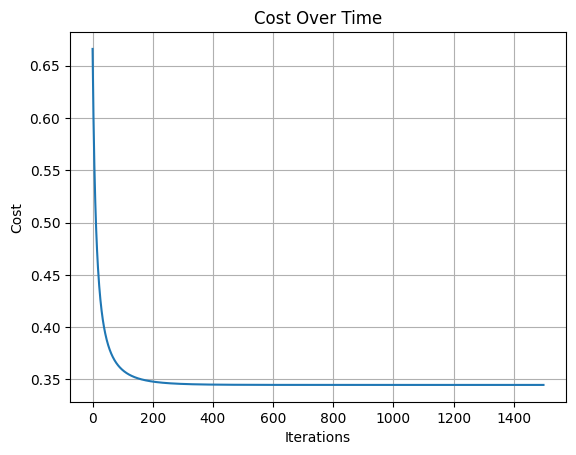

In [25]:
## Hyper parameters

theta = np.zeros((X.shape[1], 1))
alpha = 0.2
num_iters = 1500


## Calculating the cost function and the Theta
theta, cost_history = gradient_descent(X, y, theta, alpha, num_iters)

flattened_cost_h = [c.item() for c in cost_history]

## Plotting for convenience
plt.plot(range(num_iters), flattened_cost_h)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Over Time")
plt.grid(True)
plt.show()

In [26]:
predictions = predict(X, theta)
accuracy = np.mean(predictions == y) * 100
print(f"Training accuracy: {accuracy:.2f}%")

Training accuracy: 85.25%
